# RL for Autonomous Vehicle Tasks: Safety and Traffic Optimization

## Agents

In [ ]:
# TODO: define agents here

## Scenarios

In [11]:
import gymnasium
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline
from stable_baselines3 import DQN

### Lane Changing

In [3]:
lane_changing_env = gymnasium.make('highway-v0', render_mode='rgb_array')

### Roundabout

In [4]:
roundabout_env = gymnasium.make('roundabout-v0', render_mode='rgb_array')

### Overtaking

In [5]:
overtaking_env = gymnasium.make('highway-v0', render_mode='rgb_array')

## Training and Testing

In [ ]:
# Train Function
def train(rl_agent_name, model_name, model, env):
    model.set_env(env)
    model.learn(int(100))
    model.save(rl_agent_name + "/model")
    model.save(rl_agent_name + "/" + model_name + "/model")

    print(model)

    return model

# Test Function
def test(rl_agent, env):
    model = rl_agent

    for _ in range(3):
        done = truncated = False
        obs, info = env.reset()
        while not (done or truncated):
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, info = env.step(action)
            env.render()
        print(info)
    plt.imshow(env.render())
    plt.show()
    env.close()

# Create the pipeline here!
def pipeline(rl_agent, rl_agent_name):
    print("Pipeline Started")
    
    # Lane Changing
    # - train
    rl_agent_lc = train(rl_agent_name, 'lane_changing', rl_agent, lane_changing_env)

    # - test
    test(rl_agent_lc, lane_changing_env)
    # save info

    # Roundabout
    # - test
    test(rl_agent_lc, roundabout_env)

    # - train
    rl_agent_r = train(rl_agent_name, 'roundabout', rl_agent_lc, roundabout_env)

    # - test
    test(rl_agent_r, roundabout_env)
    # save info

    # Overtaking
    # - test
    test(rl_agent_r, overtaking_env)

    # - train
    rl_agent_o = train(rl_agent_name, 'overtaking', rl_agent_r, overtaking_env)

    # - test
    test(rl_agent_o, overtaking_env)
    # save info

    # return all info 
    
    print("Pipeline Ended")

- ### Agent 1

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Pipeline Started
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 9.13     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3        |
|    time_elapsed     | 15       |
|    total_timesteps  | 46       |
----------------------------------
{'speed': 13.436031033643246, 'crashed': True, 'action': array(0), 'rewards': {'collision_reward': 1.0, 'right_lane_reward': 0.0, 'high_speed_reward': 0.0, 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': True, 'action': array(0), 'rewards': {'collision_reward': 1.0, 'right_lane_reward': 0.0, 'high_speed_reward': 0.4933243205989683, 'on_road_reward': 1.0}}
{'speed': 10.923990861130985, 'crashed': True, 'action': array(0),

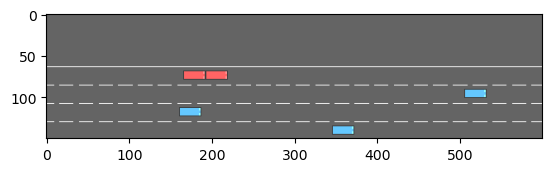

KeyboardInterrupt: 

: 

In [ ]:
# Execute the pipeline to agent 1

# a1_results = pipeline(...)

# Display Results

model = DQN('MlpPolicy', lane_changing_env,
        policy_kwargs=dict(net_arch=[256, 256]),
        learning_rate=5e-4,
        buffer_size=15000,
        learning_starts=200,
        batch_size=32,
        gamma=0.8,
        train_freq=1,
        gradient_steps=1,
        target_update_interval=50,
        verbose=1)
        
pipeline(model, "DQN")

- ### Agent N

## Performance

## Analysis

## Conclusion